In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
%matplotlib inline


**Corner Detection using python opencv library**

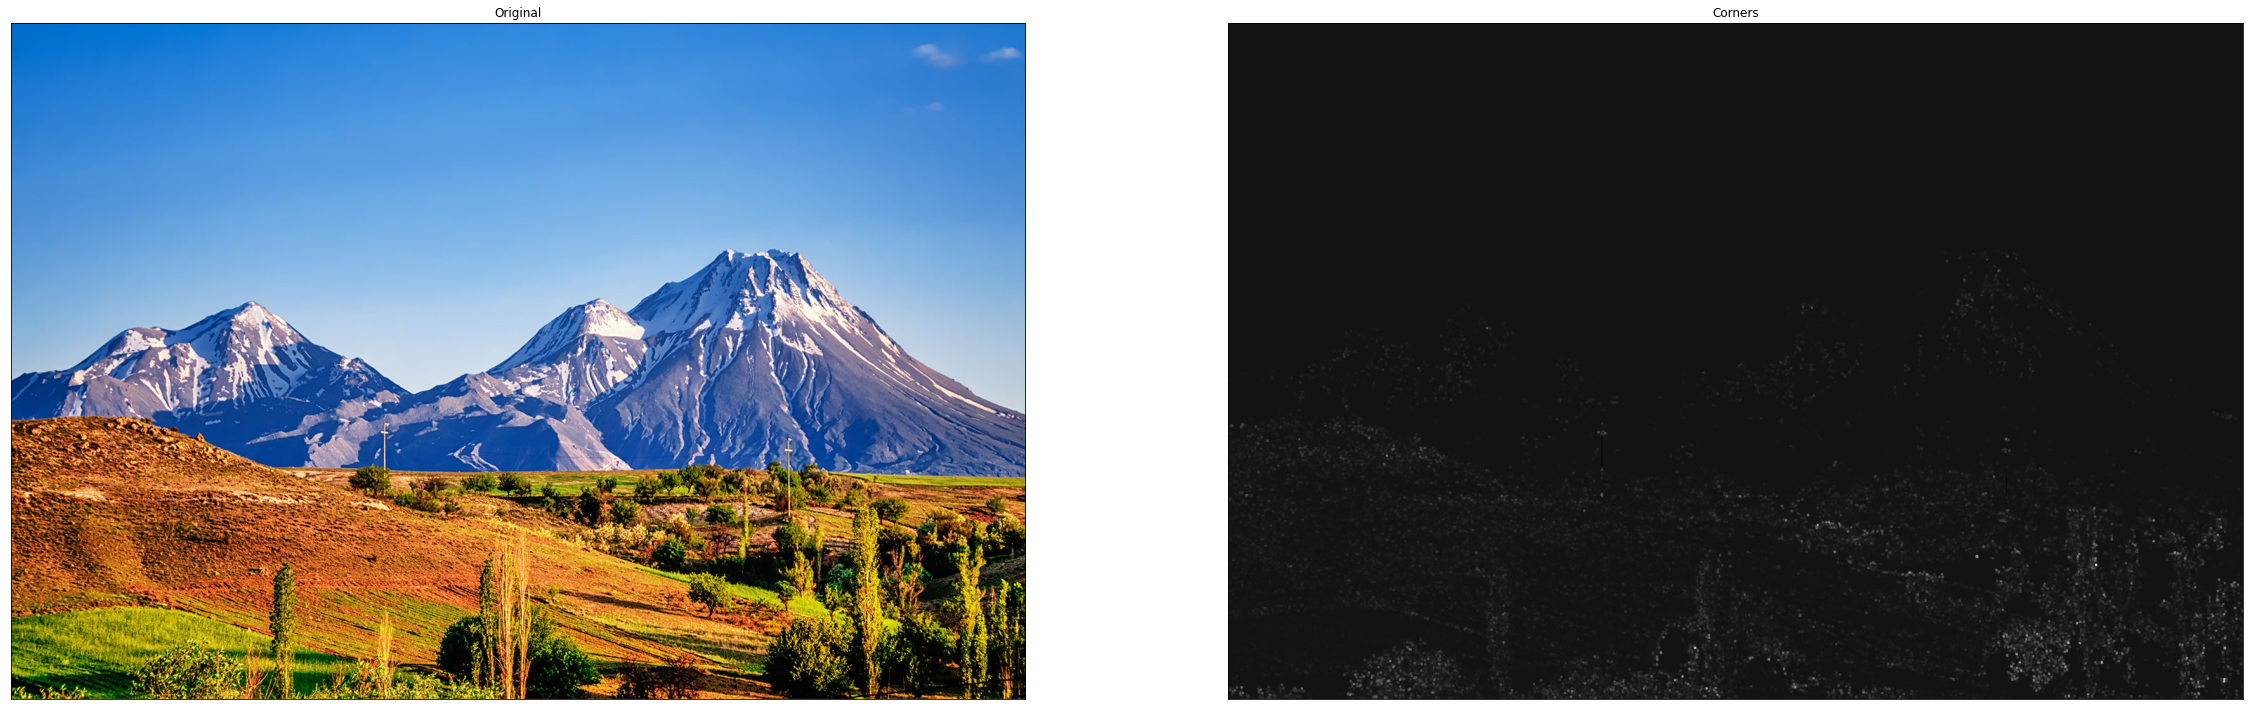

In [22]:
# Read in the image
image = cv2.imread('Taurus.jpg')


# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

rgb_img = np.copy(image_copy)

# Convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Detect corners 
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)

# plt.imshow(dst, cmap='gray')
detect_img = np.copy(dst)

# This value vary depending on the image and how many corners you want to detect
# Try changing this free parameter, 0.1, to be larger or smaller and see what happens
thresh = 0.1*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image_copy)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 1)


plt.figure(figsize=(40, 30))
plt.subplot(121)
plt.imshow(rgb_img)
plt.title("Original")
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(detect_img, cmap='gray')
plt.title("Corners")
plt.xticks([])
plt.yticks([])
# plt.subplot(133)
# plt.imshow(corner_image)
# plt.title("Corner in Original")
# plt.xticks([])
# plt.yticks([])
plt.show()


**Plot Corners in original image**

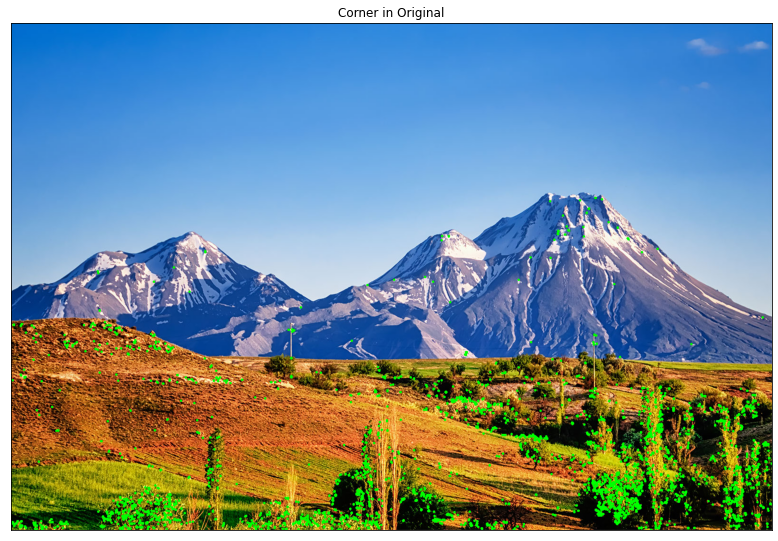

In [24]:
plt.figure(figsize=(30, 25))
plt.subplot(121)
plt.imshow(corner_image)
plt.title("Corner in Original")
plt.xticks([])
plt.yticks([])
plt.show()

**Corner Detection using python opencv library but this time we find everything individually.**<br/>
**For Filtering, Edge detection, gaussian smooting we use python opencv library**

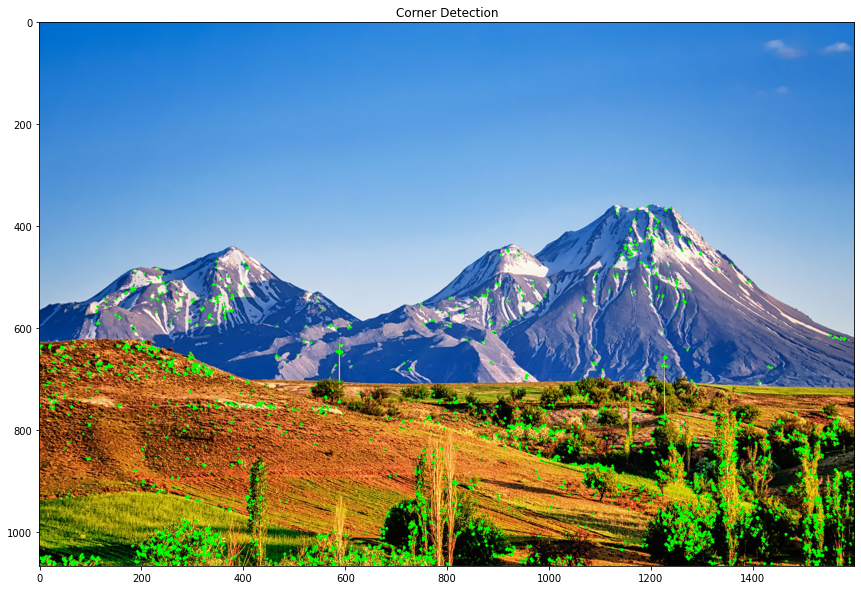

In [4]:
# Load image
img = cv2.imread('Taurus.jpg')

# Make a copy of the image
img_copy = np.copy(img)

# Convert image from BGR to RGB
img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)

# Convert to grayscale for filtering
gray = cv2.cvtColor(img_copy, cv2.COLOR_RGB2GRAY)


# Copy grayscale and convert to float32 type
gray_1 = np.copy(gray)
gray_1 = np.float32(gray_1)
img_1 = np.copy(img)

# Compute derivatives in both x and y directions
sobelx = cv2.Sobel(gray_1, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray_1, cv2.CV_64F, 0, 1, ksize=5)

# Determine M = [A C ; C B] performing element-wise multiplication
A = np.square(sobelx)
B = np.square(sobely)
C = np.multiply(sobelx, sobely)

# Apply gaussian filter to matrix components
gauss = np.array([[1, 2, 1],
                  [2, 4, 2], 
                  [1, 2, 1]])/16
A_fil = cv2.filter2D(A, cv2.CV_64F, gauss)
B_fil = cv2.filter2D(B, cv2.CV_64F, gauss)
C_fil = cv2.filter2D(C, cv2.CV_64F, gauss)

# Calculate determinant
det = A_fil * B_fil - (C_fil ** 2)

# Calculate trace (alpha = 0.04 to 0.06)
alpha = 0.06
trace = alpha * (A_fil + B_fil) ** 2

# Using determinant and trace, calculate corner response function
R = det - trace

corner_image = np.copy(img_copy)
thresh = 0.1*R.max()
# print(thresh)
# print(R.shape)
for i in range(0, len(R)):
  for j in range(0, len(R[0])):
    if(R[i][j] > thresh):
      # R[i][j] = 1
      cv2.circle(corner_image, (j, i), 2, (0,255,0), 1)
    # else:
    #   R[i][j] = 0


# Display corner response function
f, ax1 = plt.subplots(1, 1, figsize=(20,10))

ax1.set_title('Corner Detection')
ax1.imshow(corner_image, cmap='gray')



**Customize Python Implementation of X Derivative of Sobel Edge Detection**

In [0]:
def sobel_x_filter(img):
  x_filter = [[1,0,-1], [2,0,-2], [1,0,-1]]
  y_filter = [[1,2,1], [0,0,0], [-1,-2,-1]]

  new_img = img.copy()

  n, m = img.shape
  # print(n, m)

  for i in range(3, n - 2):
    # print(i)
    for j in range(3, m - 2):
      # 3x3 matrix
      matrix = img[i-1:i+2,j-1:j+2]
      dx_temp = matrix * x_filter
      dx = dx_temp.sum() / 4
      new_img[i,j] = dx

  new_img = new_img / new_img.max()
  return new_img

**Customize Python Implementation of Y Derivative of Sobel Edge Detection**

In [0]:
def sobel_y_filter(img):
  x_filter = [[1,0,-1], [2,0,-2], [1,0,-1]]

  y_filter = [[1,2,1], [0,0,0], [-1,-2,-1]]

  new_img = img.copy()

  n, m = img.shape
  # print(n, m)

  for i in range(3, n - 2):
    # print(i)
    for j in range(3, m - 2):
      # 3x3 matrix
      matrix = img[i-1:i+2,j-1:j+2]
      dy_temp = matrix * y_filter
      dy = dy_temp.sum() / 4
      new_img[i,j] = dy

  new_img = new_img / new_img.max()
  return new_img

**Customize Python Implementation of Sobel Edge Detection for both X and Y Direction**

In [0]:
def sobel_filter(img):
  x_filter = [[1,0,-1], [2,0,-2], [1,0,-1]]

  y_filter = [[1,2,1], [0,0,0], [-1,-2,-1]]

  new_img = img.copy()

  n, m = img.shape
  # print(n, m)

  for i in range(3, n - 2):
    # print(i)
    for j in range(3, m - 2):
      # 3x3 matrix
      matrix = img[i-1:i+2,j-1:j+2]
      dy_temp = matrix * y_filter
      dy=dy_temp.sum() / 4

      dx_temp = matrix * x_filter
      dx = dx_temp.sum() / 4

      val = math.sqrt(dx*dx + dy * dy)
      
      new_img[i,j] = val 

  new_img = new_img / new_img.max()
  return new_img

**Customize Python Implementation of Gaussian Filtering**

In [0]:
def gauss_filter(img):
  gaussian_kernel = [[1, 2, 1], [2, 4, 2], [1, 2, 1]]

  new_img = img.copy()

  n, m = img.shape
  # print(n, m)
  # print(img)

  for i in range(1, n - 2):
    for j in range(1, m - 2):
      pixel_matrix = img[i - 1 : i + 2, j - 1 : j + 2]
      val_m = pixel_matrix * gaussian_kernel
      val = val_m.sum() / 16
      new_img[i][j] = val
      # print(val)
  return new_img

In [0]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


**Sobel Edge Detection for a normal image with grayscale filtering.**

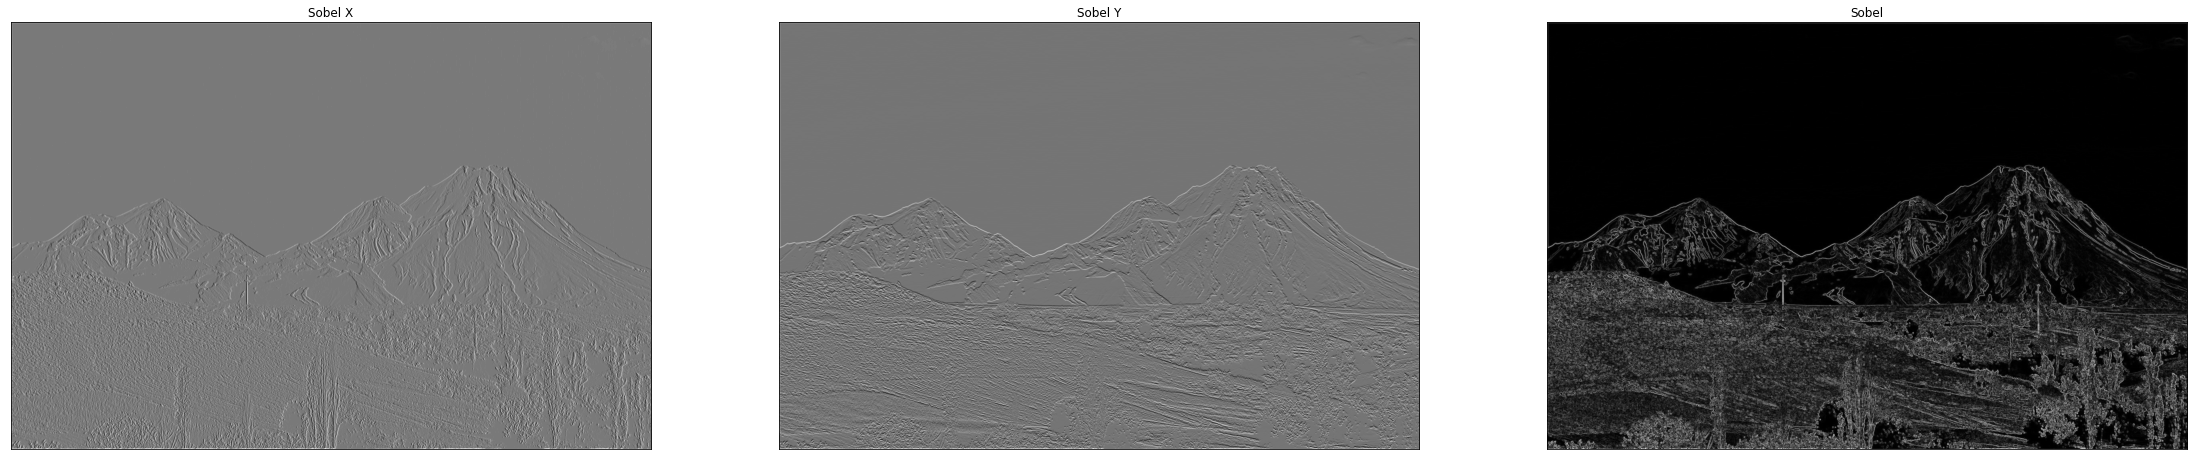

In [12]:
rgb_img = plt.imread('Taurus.jpg')
img = rgb2gray(rgb_img)

img_copy = np.copy(img)
sobelx = sobel_x_filter(img_copy)
sobely = sobel_y_filter(img_copy)
sobel = sobel_filter(img_copy)

plt.figure(figsize=(39, 33))
plt.subplot(131)
plt.imshow(sobelx, cmap='gray')
plt.title("Sobel X")
plt.xticks([])
plt.yticks([])
plt.subplot(132)
plt.imshow(sobely, cmap='gray')
plt.title("Sobel Y")
plt.xticks([])
plt.yticks([])
plt.subplot(133)
plt.imshow(sobel, cmap='gray')
plt.title("Sobel")
plt.xticks([])
plt.yticks([])
plt.show()

**Haris Corner Detection Algorithm**



***High-level pseudocode for Haris Corner Detection Algorithm***



**1.   Take the grayscale of the original image.**<br/>

**2.   Apply Sobel operator to find the x and y gradient values for every pixel in the grayscale image.**<br/>

**3. Apply a Gaussian filter to smooth out any noise.** <br/>

**4. For each pixel p in the grayscale image, consider a 3×3 window around it and compute the corner strength function. Call this its Harris value.**<br/>

**5. Find all pixels that exceed a certain threshold and are the local maxima within a certain window (to prevent redundant dupes of features)**<br/>

**6. For each pixel that meets the criteria in 5, compute a feature descriptor.**
<br/>
<br/>

******
***Use the following criteria to decide if it is a corner***<br/>


```
det(M) − 0.06 trace(M)^2 > τ
```


***Note ::However Harris argues that there’s no need to find lambdas (the eigenvalues), instead it is enough to know the following:***


```
det(M) = λ1.λ2
trace(M) = λ1+λ2
```




**Step-1: Converting image to grayscale**

In [0]:
# img = plt.imread('Taurus.jpg')

rgb_img = plt.imread('Taurus.jpg')
img = rgb2gray(rgb_img)


**Step-2: Apply Sobel operator to find the x and y gradient values for every pixel in the grayscale image.**

In [0]:
img_copy = np.copy(img)
sobelx = sobel_x_filter(img_copy)
sobely = sobel_y_filter(img_copy)


**Step-3: Calculating Matrix element from sobel x and y gradient**<br/>
![Image](https://i.ibb.co/YjkjN8J/haris-corner.png)

In [0]:
# Determine M = [A C ; C B] performing element-wise multiplication
A = np.square(sobelx)
B = np.square(sobely)
C = np.multiply(sobelx, sobely)


**Step-4: Apply a Gaussian filter to smooth out any noise.**

In [0]:
A_filter = gauss_filter(A)
B_filter = gauss_filter(B)
C_filter = gauss_filter(C)


**Step-5: compute a feature descriptor.**

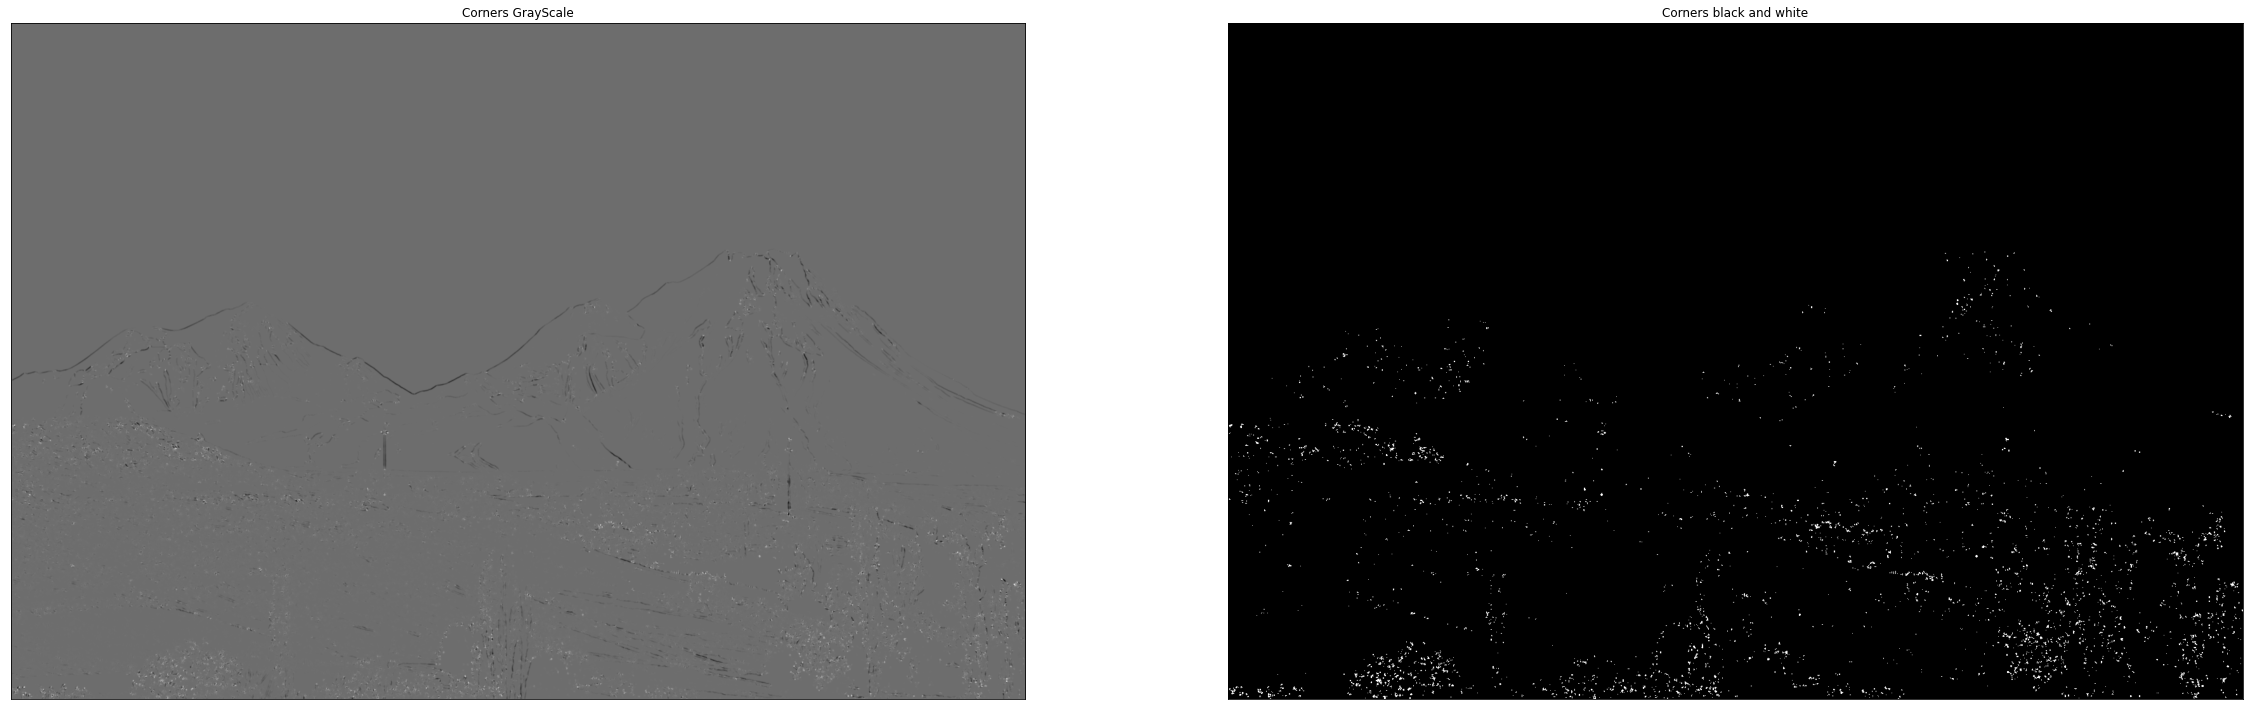

In [33]:
# Calculate determinant
det = A_fil * B_fil - (C_fil ** 2)

# Calculate trace (alpha = 0.04 to 0.06)
alpha = 0.06
trace = alpha * (A_fil + B_fil) ** 2

# Using determinant and trace, calculate corner response
R = det - trace



thresh = 0.1*R.max()
# print(thresh)
# corner_img = np.copy(img)
corner_image = np.copy(rgb_img)

new_R = np.copy(R)
for i in range(0, len(R)):
  for j in range(0, len(R[0])):
    if(R[i][j] > thresh):
      new_R[i][j] = 1
    else:
      new_R[i][j] = 0
    
for i in range(0, len(R)):
  for j in range(0, len(R[0])):
    # print(R[i][j], end=' ')
    if(new_R[i][j] == 1):
      cv2.circle(corner_image, (j, i), 2, (0,255,0), 1)
  


plt.figure(figsize=(40, 33))

plt.subplot(121)
plt.imshow(R, cmap='gray')
plt.title("Corners GrayScale")
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(new_R, cmap = 'gray')
plt.title("Corners black and white")
plt.xticks([])
plt.yticks([])
plt.show()


**Plot corners in original Image**

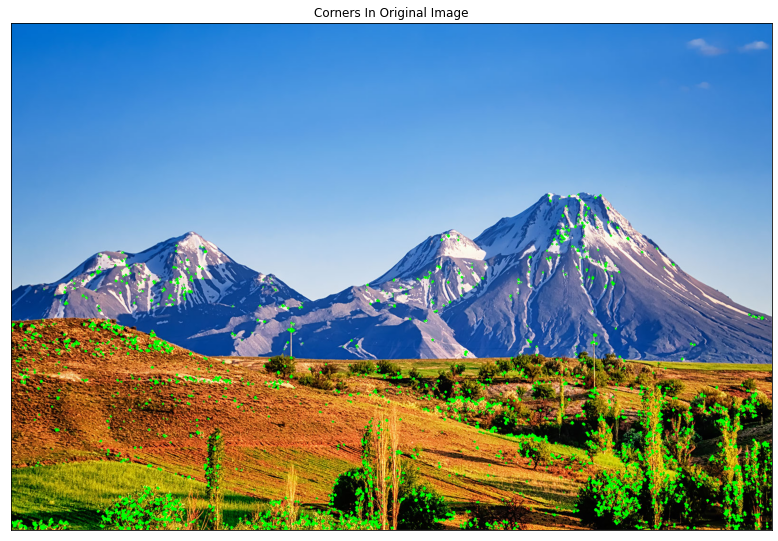

In [34]:
plt.figure(figsize=(30, 25))

plt.subplot(121)
plt.imshow(corner_image, cmap='gray')
plt.title("Corners In Original Image")
plt.xticks([])
plt.yticks([])
plt.show()